In [1]:
import pandas as pd
import numpy as np

from scipy.ndimage import rotate
from scipy.ndimage import gaussian_filter

import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
df = pd.read_csv('../data/emotions/emotions.csv')

In [3]:
df['category'] = df['category'].str.strip()

In [4]:
del df['Unnamed: 0']

In [5]:
mapping = {
    0: 'Angry', 
    1: 'Disgust', 
    2: 'Fear', 
    3: 'Happy', 
    4: 'Sad', 
    5: 'Surprise', 
    6: 'Neutral'   
}

In [6]:
df['y'] = df['y'].map(mapping)

In [ ]:
df.loc[df['y'].isin(['Disgust']), ].head()

In [ ]:
def flip_horizontally(image):
    return np.flip(image, axis = 1)

In [ ]:
def add_noise(image):
    return image + np.random.poisson(image)

In [ ]:
def rotate_right(image, angle = -20):
    return rotate(image, angle, mode='reflect', reshape=False)

In [ ]:
def rotate_left(image, angle = 20):
    return rotate(image, angle, mode='reflect', reshape=False)

In [8]:
def add_blur(image):
    return gaussian_filter(image, sigma=1)

In [ ]:
df.columns

In [ ]:
augmented = pd.DataFrame(columns=df.columns)

In [ ]:
augmented.loc[0] = [df.iloc[0, 0]] + flip_horizontally(np.array(df.iloc[0, 1:2305]).reshape((48, 48))).flatten().tolist() + [df.iloc[0, 2305]]

In [ ]:
augmented

In [ ]:
for i, index in enumerate(labels.index.values):
    
    augmented.loc[i] = [df.iloc[index, 0]] + flip_horizontally(np.array(df.iloc[index, 1:2305]).reshape((48, 48))).flatten().tolist() + [df.iloc[index, 2305]]
    
    
    
    
    
    

In [9]:
X = np.array(df.iloc[:, 1:2305])

In [11]:
X[0].reshape((48, 48))

array([[ 70,  80,  82, ...,  52,  43,  41],
       [ 65,  61,  58, ...,  56,  52,  44],
       [ 50,  43,  54, ...,  49,  56,  47],
       ...,
       [ 91,  65,  42, ...,  72,  56,  43],
       [ 77,  82,  79, ..., 105,  70,  46],
       [ 77,  72,  84, ..., 106, 109,  82]])

In [13]:
np.array(df.iloc[0, 1:2305], dtype = 'int').reshape((48, 48))

array([[ 70,  80,  82, ...,  52,  43,  41],
       [ 65,  61,  58, ...,  56,  52,  44],
       [ 50,  43,  54, ...,  49,  56,  47],
       ...,
       [ 91,  65,  42, ...,  72,  56,  43],
       [ 77,  82,  79, ..., 105,  70,  46],
       [ 77,  72,  84, ..., 106, 109,  82]])

In [ ]:
plt.imshow(X[0].reshape((48, 48)), cmap = 'gray')

In [ ]:
plt.imshow(flip_horizontally(X[0].reshape(48, 48)), cmap = 'gray')

In [ ]:
plt.imshow(add_noise(X[0].reshape(48, 48)), cmap = 'gray')

In [ ]:
plt.imshow(rotate_right(X[0].reshape(48, 48)), cmap = 'gray')

In [ ]:
plt.imshow(rotate_left(X[0].reshape(48, 48)), cmap = 'gray')

In [ ]:
plt.imshow(add_blur(X[0].reshape(48, 48)), cmap = 'gray')

In [26]:
def augment(df: pd.DataFrame, classes_to_augment: list, augmentations: list) -> pd.DataFrame:
    
    indices = df.loc[df['y'].isin(classes_to_augment),].index.values
    
    print(len(indices))
    
    temp = []

    if 'flip' in augmentations:
        for i, index in enumerate(indices):
                temp.append([df.iloc[index, 0]] + flip_horizontally(np.array(df.iloc[index, 1:2305]).reshape((48, 48))).flatten().tolist() + [df.iloc[index, 2305]])
    
    if 'noise' in augmentations:
        for i, index in enumerate(indices):
                temp.append([df.iloc[index, 0]] + add_noise(np.array(df.iloc[index, 1:2305]).reshape((48, 48))).flatten().tolist() + [df.iloc[index, 2305]])
                
    if 'rotate_right' in augmentations:
        for i, index in enumerate(indices):
                temp.append([df.iloc[index, 0]] + rotate_right(np.array(df.iloc[index, 1:2305], dtype='int').reshape((48, 48))).flatten().tolist() + [df.iloc[index, 2305]])
                
    if 'rotate_left' in augmentations:
        for i, index in enumerate(indices):
                temp.append([df.iloc[index, 0]] + rotate_left(np.array(df.iloc[index, 1:2305], dtype='int').reshape((48, 48))).flatten().tolist() + [df.iloc[index, 2305]])
             
    if 'blur' in augmentations:
        for i, index in enumerate(indices):
                temp.append([df.iloc[index, 0]] + add_blur(np.array(df.iloc[index, 1:2305], dtype='int').reshape((48, 48))).flatten().tolist() + [df.iloc[index, 2305]])
          
    data = pd.DataFrame(temp, columns=df.columns)
    
    return data

In [ ]:
train_set = df[df['category'] == 'Training']

In [ ]:
augment(train_set, ['Disgust'], ['flip', 'rotate_right', 'rotate_left', 'blur'])

### Watch results

In [27]:
augmented = pd.read_csv('../data/emotions/augmentations.csv')

In [31]:
augmented['category'] = augmented['category'].str.strip()

In [32]:
del augmented['Unnamed: 0']

In [36]:
augmented.groupby(['y'])

,0,1,2,3,4,5,6,7,8,9,...,2295,2296,2297,2298,2299,2300,2301,2302,2303,category
y,,,,,,,,,,,,,,,,,,,,,
Angry,2475,2475,2475,2475,2475,2475,2475,2475,2475,2475,...,2475,2475,2475,2475,2475,2475,2475,2475,2475,2475
Disgust,2735,2735,2735,2735,2735,2735,2735,2735,2735,2735,...,2735,2735,2735,2735,2735,2735,2735,2735,2735,2735
Fear,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560,...,2560,2560,2560,2560,2560,2560,2560,2560,2560,2560
Neutral,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095,...,3095,3095,3095,3095,3095,3095,3095,3095,3095,3095
Sad,3035,3035,3035,3035,3035,3035,3035,3035,3035,3035,...,3035,3035,3035,3035,3035,3035,3035,3035,3035,3035


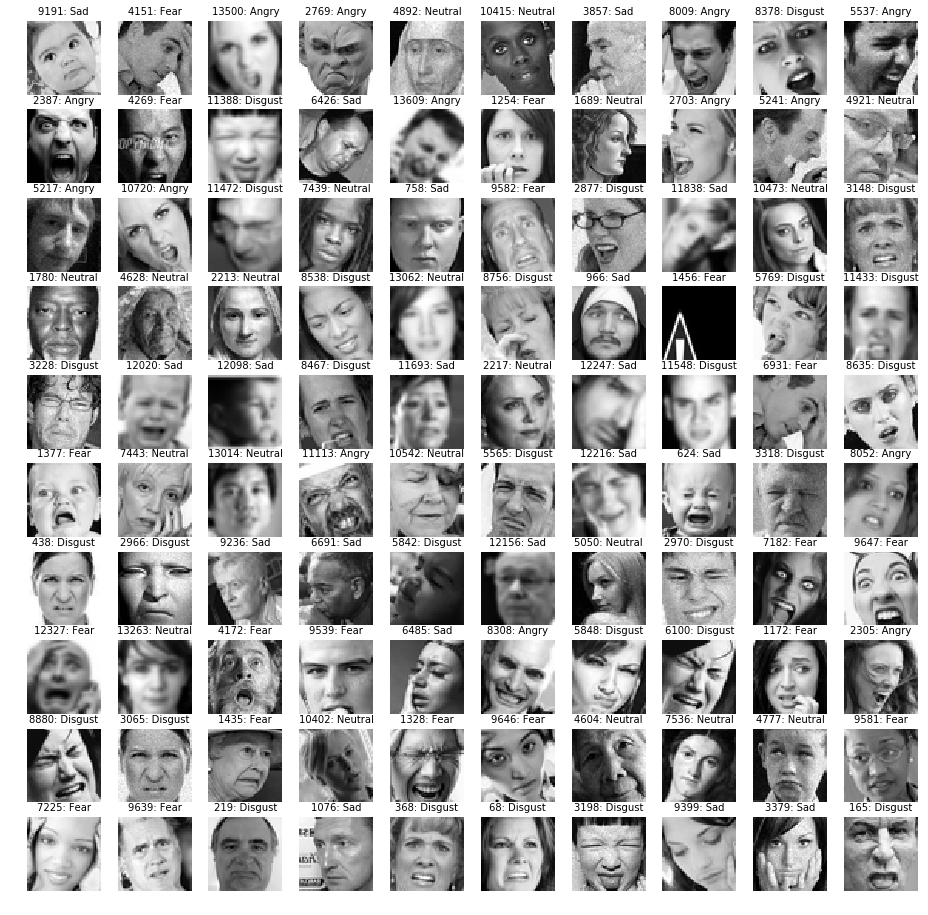

In [39]:
fig = plt.figure(figsize=(16, 16))

rows = 10
cols = 10

for i in range(1, rows * cols + 1):
    idx = np.random.randint(1, len(augmented))
    
    fig.add_subplot(rows, cols, i)
    image = np.array(augmented.iloc[idx, 1:2305].values, dtype=float)
    plt.imshow(image.reshape((48, 48)), cmap = 'gray')
    plt.title(str(idx) + ": " + augmented.y[idx], fontdict = {'fontsize': 10, 'color': "black"})
    plt.axis('off')
plt.show()